In [1]:
"""
Author:Mustafa Kağan Yalım
270201090
"""
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import random
from scipy import ndimage

In [2]:
#I wrote different functions for 2 image plotting and 3 image plotting
def plot_image2samples(image_1, image_2, title_1="Original", title_2="Edited"):


    plt.figure(figsize=(25,25))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

def plot_image3samples(image_1, image_2, image_3, title_1="Original", title_2="Edited",title_3="Edited"):


    plt.figure(figsize=(35,35))
    plt.subplot(1, 3, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 3, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.subplot(1, 3, 3)
    plt.imshow(image_3,cmap="gray")
    plt.title(title_3)
    plt.show()

def salt_pepper_noise(img,prob):
    image=img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            noise_check=random.randint(0,prob*100)
            if noise_check==prob*100:
                noise_value=random.randint(0,256)
                image[i,j]=noise_value
    return image

def roberts(img):
    filter1=np.array( [[-1, 0 ],
                    [0,1 ]] )
    filter2=np.array( [[ 0, -1 ],
                    [ 1, 0 ]] )
    copy1=img.copy()
    copy1.astype('float64')
    copy1=copy1/255.0
    #I used the ndimage.convolve function to navigate the photo with roberts filters
    corner1=ndimage.convolve(copy1,filter1)
    corner2=ndimage.convolve(copy1,filter2)
    edged_img=np.sqrt(np.square(corner2)+np.square(corner1))
    edged_img*=255
    plot_image3samples(corner1,corner2,edged_img,"First Kernel","Second Kernel","Both")
    return edged_img    

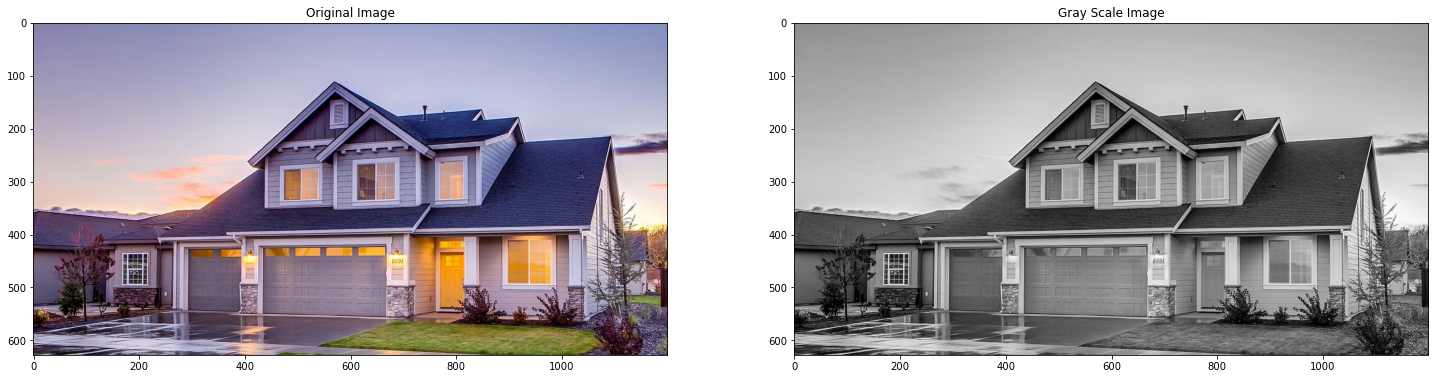

In [3]:
img=io.imread("https://progayrimenkul.com.tr/uploads/2021/10/28/villa-alirken-nelere-dikkat-edilmeli-1.jpg")
img_gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plot_image2samples(img,img_gray,"Original Image","Gray Scale Image")

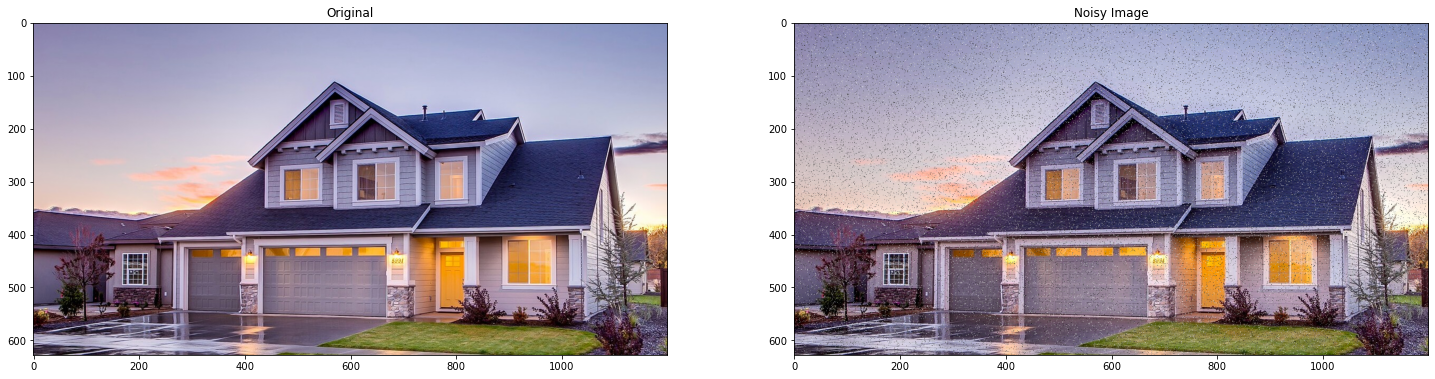

In [4]:
img_noise=salt_pepper_noise(img,0.15)
plot_image2samples(img,img_noise,"Original","Noisy Image")

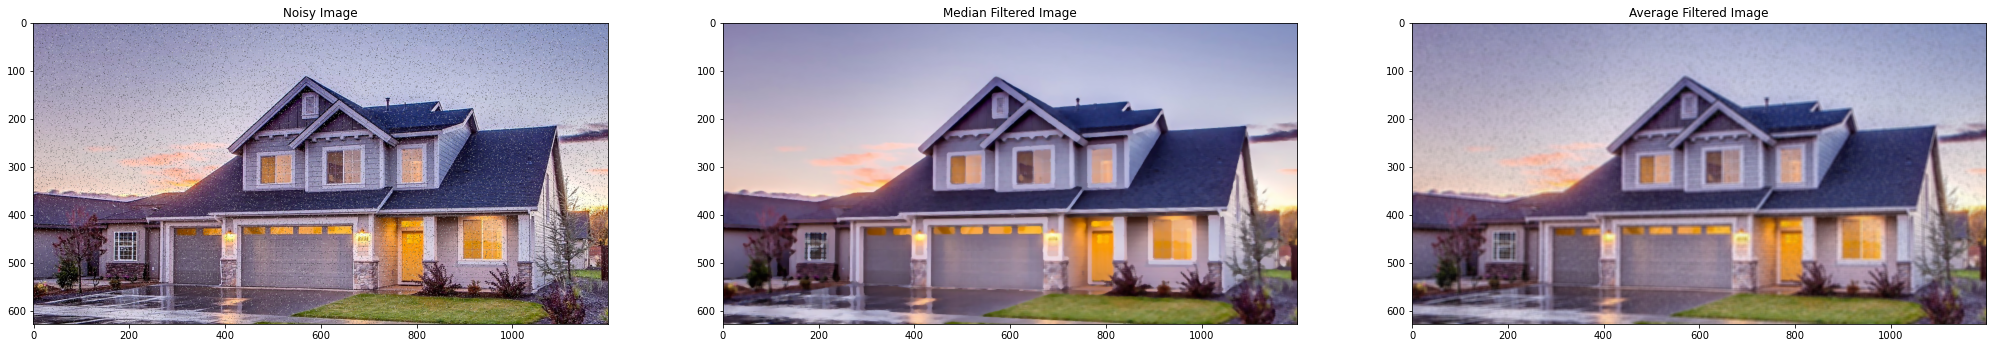

In [5]:
img_median = cv.medianBlur(img_noise,7)
kernel = np.ones((7,7))/49
image_avg_filtered=cv.filter2D(src=img_noise,ddepth=-1,kernel=kernel)
plot_image3samples(img_noise,img_median,image_avg_filtered,title_1="Noisy Image",title_2="Median Filtered Image",title_3="Average Filtered Image")

The median filter worked better than the average filter as we noised the picture with a probability of 0.15. Because when applying a median filter on a photo with a noise probability of 0.15, the probability of the median value being noised pixels is very low. In the average filter, the average of the neighboring pixels is taken and written to the center pixel, so the noised pixel changes the average a lot. In general this is why median filter is better for smoothing salt pepper noise.

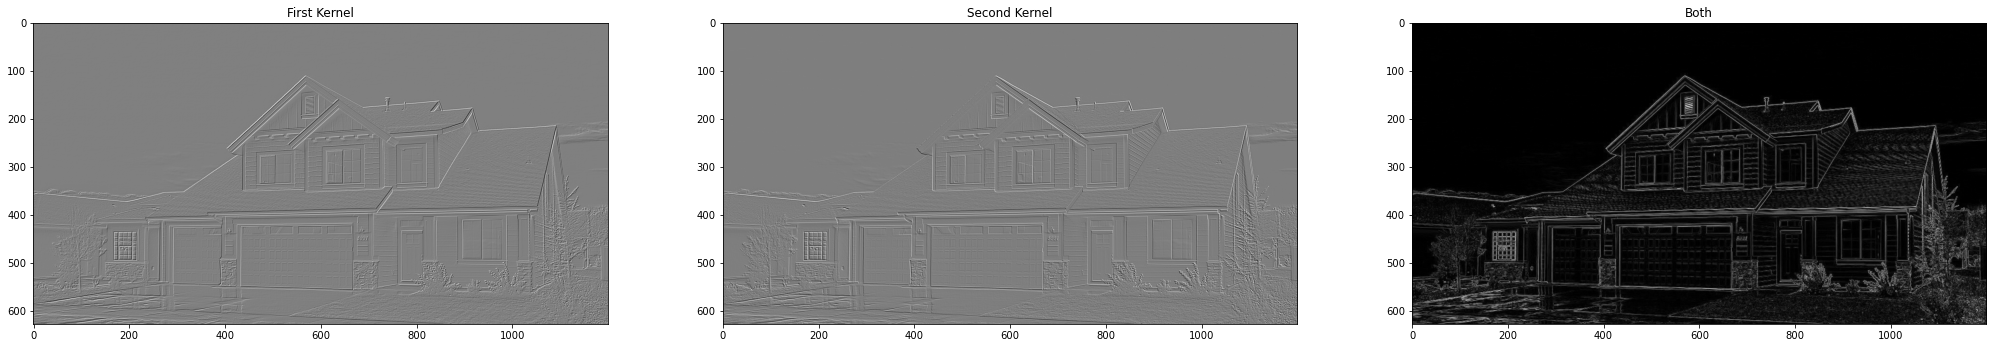

In [6]:
img_roberts=roberts(img_gray)

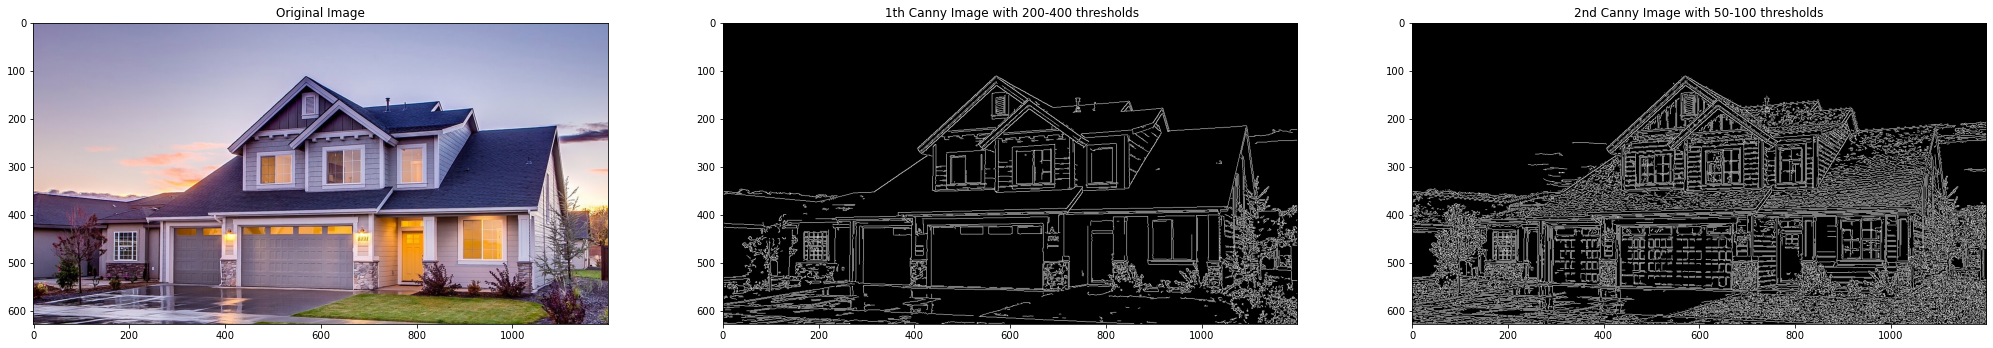

In [7]:
img_canny1=cv.Canny(img,200,400)
img_canny2=cv.Canny(img,50,100)
plot_image3samples(img,img_canny1,img_canny2,"Original Image"," 1th Canny Image with 200-400 thresholds","2nd Canny Image with 50-100 thresholds")

In the Canny function, the first number entered into the function is lower threshold, the second number is upper threshold. Strengths of all edges in the photo are determined. All edges less than lower threshold are ignored. Edges more than the upper threshold are considered strong edges. A new process is started for numbers between two ranges. If an edge in range is connected to a strong edge, that edge is also drawn at the output. If an edge in range is not connected to a strong edge, that edge is also ignored at the output. As in the example, since the threshold in the second picture is lower, more edges appear.